In [1]:
import numpy as np

In [2]:
data_set = np.array( [[777, 1], [781, 0], [843, 0], [866, 0], [869, 1], [872, 1], [876, 1], [893, 1], [894, 1], [895, 0],
                     [898, 1], [906, 0], [907, 1], [909, 1], [911, 1], [911, 0], [914, 0], [927, 1], [932, 1], [936, 0],
                     [940, 0], [942.5, 0], [943, 0], [945, 1], [945, 0], [948, 1], [951, 0], [953, 0], [956, 0],
                     [957, 1], [957, 0], [959, 0], [960, 0], [966, 1], [966, 0], [969, 1], [970, 0], [971, 1], [972, 0],
                     [973, 0], [977, 0], [983, 1], [984, 0], [985, 1], [989, 1], [992.5, 1], [993, 1], [996, 1],
                     [998, 1], [1001, 0], [1002, 0], [1005, 0], [1006, 0], [1009, 1], [1011.5, 1], [1012, 1], [1012, 0],
                     [1013, 0], [1015, 0], [1016, 0], [1018, 0], [1022, 1], [1023, 0], [1025, 1], [1027, 0], [1029, 1],
                     [1031, 1], [1031, 0], [1031.5, 0], [1033, 1], [1036, 1], [1043, 1], [1043, 0], [1044, 1], [1044, 0],
                     [1045, 0], [1047, 0], [1053, 1], [1055, 1], [1058, 0], [1059, 1], [1060, 1], [1060, 0], [1064, 0],
                     [1070, 0], [1073, 0], [1080, 1], [1085, 1], [1093, 0], [1093.5, 1], [1094, 1], [1106, 0], [1107, 0],
                     [1118, 0], [1128, 1], [1139, 1], [1153, 0]] )

set_length = data_set.shape[0]

In [3]:
months = data_set.transpose()[0]

In [4]:
deltas = data_set.transpose()[1]

In [5]:
def Lambda_1_n(x):
    answer = 0
    for j in range(set_length):
        answer += (deltas[j] * int(months[j] <= x)) / (np.sum(months >= months[j]))
    return answer

In [6]:
def Lambda_n(x):
    answer = 0
    for j in range(set_length):
        answer += (int(months[j] <= x)) / (np.sum(months >= months[j]))
    return answer

In [7]:
def H_n(x):
    return np.sum(months < x) / set_length

# 1 - H_n(u -)
def First_H(u):
    answer = 0
    for j in range(set_length):
        answer += (int(months[j] >= u))
    answer = answer / set_length
    return answer

# 1 - H_n(u)
def Second_H(x):
    answer = 0
    for j in range(set_length):
        answer += (int(months[j] > x))
    answer /= set_length
    return answer

# H_1n(u) - H_1n(u-)
def Third_H(u):
    answer = 0
    for j in range(set_length):
        answer += deltas[j] * (int(months[j] == u))
    answer /= set_length
    return answer

In [8]:
def F_AB_n(x):
    if x < np.min(months):
        return 0
    if x > np.max(months):
        return 1
    #answer = 0
    #for u in range(x + 1):
    #   answer += Third_H(u) / First_H(u)
    #answer = 1 - np.exp(-1 * answer)
    return 1 - np.exp(-1 * Lambda_1_n(x))

In [9]:
def F_KM_n(x):
    if x < np.min(months):
        return 0
    if x > np.max(months):
        return 1
    answer = 1
    for u in range(int(x) + 1):
        answer *= 1 - (Third_H(u) / First_H(u))
    answer = 1 - answer
    return answer

In [10]:
def F_RR_n(x):
    if x < np.min(months):
        return 0
    if x > np.max(months):
        return 1
    answer = 1 - np.power(Second_H(x), (Lambda_1_n(x) / Lambda_n(x)))
    return answer

In [34]:
p_n = np.sum(deltas) / set_length

In [35]:
def F_ACL_n(x):
    if x < np.min(months):
        return 0
    if x > np.max(months):
        return 1
    return 1 - (np.power((1 - H_n(x)), p_n))

In [13]:
x_set = np.array(range(np.min(months).astype(int), np.max(months).astype(int)))

---------------------------
Построение ядерных оценок

In [14]:
from scipy import stats

h_n = np.power(set_length, -1/3)

def G(t):
    return stats.norm().cdf(t)

-----------------------
AB

In [15]:
AB_y2 = np.zeros(0)

for j in range(set_length):
    AB_y2 = np.append(AB_y2, F_AB_n(months[j]))

In [16]:
def KE_AB(x):
    answer = 0.0
    for j in range(1, set_length):
        answer += G((x - months[j]) / h_n) * (AB_y2[j] - AB_y2[j-1])
    return answer

In [17]:
KE_AB_y = np.zeros(0)

for x in x_set:
    KE_AB_y = np.append(KE_AB_y, KE_AB(x))

KE_AB_y

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

---------------
KM

In [18]:
KM_y2 = np.zeros(0)

for j in range(set_length):
    KM_y2 = np.append(KM_y2, F_KM_n(months[j]))

In [19]:
def KE_KM(x):
    answer = 0.0
    for j in range(1, set_length):
        answer += G((x - months[j]) / h_n) * (KM_y2[j] - KM_y2[j-1])
    return answer

In [20]:
KE_KM_y = np.zeros(0)

for x in x_set:
    KE_KM_y = np.append(KE_KM_y, KE_KM(x))

KE_KM_y

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

-------------------
RR

In [21]:
RR_y2 = np.zeros(0)

for j in range(set_length):
    RR_y2 = np.append(RR_y2, F_RR_n(months[j]))

In [22]:
def KE_RR(x):
    answer = 0.0
    for j in range(1, set_length):
        answer += G((x - months[j]) / h_n) * (RR_y2[j] - RR_y2[j-1])
    return answer

In [23]:
KE_RR_y = np.zeros(0)

for x in x_set:
    KE_RR_y = np.append(KE_RR_y, KE_RR(x))

KE_RR_y

array([2.71099507e-82, 4.43481174e-50, 5.51443452e-27, 6.04961764e-13,
       1.39594606e-07, 2.79188608e-07, 2.79189213e-07, 2.79189213e-07,
       2.79189213e-07, 2.79189213e-07, 2.79189213e-07, 2.79189213e-07,
       2.79189213e-07, 2.79189213e-07, 2.79189213e-07, 2.79189213e-07,
       2.79189213e-07, 2.79189213e-07, 2.79189213e-07, 2.79189213e-07,
       2.79189213e-07, 2.79189213e-07, 2.79189213e-07, 2.79189213e-07,
       2.79189213e-07, 2.79189213e-07, 2.79189213e-07, 2.79189213e-07,
       2.79189213e-07, 2.79189213e-07, 2.79189213e-07, 2.79189213e-07,
       2.79189213e-07, 2.79189213e-07, 2.79189213e-07, 2.79189213e-07,
       2.79189213e-07, 2.79189213e-07, 2.79189213e-07, 2.79189213e-07,
       2.79189213e-07, 2.79189213e-07, 2.79189213e-07, 2.79189213e-07,
       2.79189213e-07, 2.79189213e-07, 2.79189213e-07, 2.79189213e-07,
       2.79189213e-07, 2.79189213e-07, 2.79189213e-07, 2.79189213e-07,
       2.79189213e-07, 2.79189213e-07, 2.79189213e-07, 2.79189213e-07,
      

------------------
ACL

In [24]:
ACL_y2 = np.zeros(0)

for j in range(set_length):
    ACL_y2 = np.append(ACL_y2, F_ACL_n(months[j]))

In [25]:
def KE_ACL(x):
    answer = 0.0
    for j in range(1, set_length):
        answer += G((x - months[j]) / h_n) * (ACL_y2[j] - ACL_y2[j-1])
    return answer

In [36]:
KE_ACL_y = np.zeros(0)

for x in x_set:
    KE_ACL_y = np.append(KE_ACL_y, KE_ACL(x))

KE_ACL_y

array([4.76020956e-78, 7.78704228e-46, 9.68274130e-23, 1.06224641e-08,
       2.45112795e-03, 4.90224528e-03, 4.90225591e-03, 4.90225591e-03,
       4.90225591e-03, 4.90225591e-03, 4.90225591e-03, 4.90225591e-03,
       4.90225591e-03, 4.90225591e-03, 4.90225591e-03, 4.90225591e-03,
       4.90225591e-03, 4.90225591e-03, 4.90225591e-03, 4.90225591e-03,
       4.90225591e-03, 4.90225591e-03, 4.90225591e-03, 4.90225591e-03,
       4.90225591e-03, 4.90225591e-03, 4.90225591e-03, 4.90225591e-03,
       4.90225591e-03, 4.90225591e-03, 4.90225591e-03, 4.90225591e-03,
       4.90225591e-03, 4.90225591e-03, 4.90225591e-03, 4.90225591e-03,
       4.90225591e-03, 4.90225591e-03, 4.90225591e-03, 4.90225591e-03,
       4.90225591e-03, 4.90225591e-03, 4.90225591e-03, 4.90225591e-03,
       4.90225591e-03, 4.90225591e-03, 4.90225591e-03, 4.90225591e-03,
       4.90225591e-03, 4.90225591e-03, 4.90225591e-03, 4.90225591e-03,
       4.90225591e-03, 4.90225591e-03, 4.90225591e-03, 4.90225591e-03,
      

In [49]:
def H_n_hat(x):
    answer = 0.0
    for j in range(set_length):
        answer += G((x - months[j])/h_n)
    answer /= set_length
    return answer

In [53]:
def F_1n_hat(x):
    answer = 1 - H_n_hat(x)
    answer = np.power(answer, p_n)
    answer = 1 - answer
    return answer

In [52]:
F_1n_hat_y = np.zeros(0)

for x in x_set:
    F_1n_hat_y = np.append(F_1n_hat_y, F_1n_hat(x))

F_1n_hat_y

array([0.00244779, 0.00490225, 0.00490226, 0.00490227, 0.00736345,
       0.00983142, 0.00983143, 0.00983143, 0.00983143, 0.00983143,
       0.00983143, 0.00983143, 0.00983143, 0.00983143, 0.00983143,
       0.00983143, 0.00983143, 0.00983143, 0.00983143, 0.00983143,
       0.00983143, 0.00983143, 0.00983143, 0.00983143, 0.00983143,
       0.00983143, 0.00983143, 0.00983143, 0.00983143, 0.00983143,
       0.00983143, 0.00983143, 0.00983143, 0.00983143, 0.00983143,
       0.00983143, 0.00983143, 0.00983143, 0.00983143, 0.00983143,
       0.00983143, 0.00983143, 0.00983143, 0.00983143, 0.00983143,
       0.00983143, 0.00983143, 0.00983143, 0.00983143, 0.00983143,
       0.00983143, 0.00983143, 0.00983143, 0.00983143, 0.00983143,
       0.00983143, 0.00983143, 0.00983143, 0.00983143, 0.00983143,
       0.00983143, 0.00983143, 0.00983143, 0.00983143, 0.00983143,
       0.00983145, 0.01230626, 0.01478796, 0.01478797, 0.01478797,
       0.01478797, 0.01478797, 0.01478797, 0.01478797, 0.01478

In [54]:
def gamma_nj(j):
    answer = np.power( (1 - (j-1)/set_length), p_n ) - np.power( (1 - j/set_length), p_n )
    answer *= set_length
    return answer

In [56]:
def F_2n_hat(x):
    answer = 0.0
    for j in range(set_length):
        answer += gamma_nj(j) * G((x - months[j]) / h_n)
    answer /= set_length
    return answer

In [57]:
F_2n_hat_y = np.zeros(0)

for x in x_set:
    F_2n_hat_y = np.append(F_2n_hat_y, F_2n_hat(x))

F_2n_hat_y

array([0.00243788, 0.00487574, 0.00487576, 0.00487577, 0.00732688,
       0.009778  , 0.00977801, 0.00977801, 0.00977801, 0.00977801,
       0.00977801, 0.00977801, 0.00977801, 0.00977801, 0.00977801,
       0.00977801, 0.00977801, 0.00977801, 0.00977801, 0.00977801,
       0.00977801, 0.00977801, 0.00977801, 0.00977801, 0.00977801,
       0.00977801, 0.00977801, 0.00977801, 0.00977801, 0.00977801,
       0.00977801, 0.00977801, 0.00977801, 0.00977801, 0.00977801,
       0.00977801, 0.00977801, 0.00977801, 0.00977801, 0.00977801,
       0.00977801, 0.00977801, 0.00977801, 0.00977801, 0.00977801,
       0.00977801, 0.00977801, 0.00977801, 0.00977801, 0.00977801,
       0.00977801, 0.00977801, 0.00977801, 0.00977801, 0.00977801,
       0.00977801, 0.00977801, 0.00977801, 0.00977801, 0.00977801,
       0.00977801, 0.00977801, 0.00977801, 0.00977801, 0.00977801,
       0.00977802, 0.0122426 , 0.01470718, 0.01470719, 0.01470719,
       0.01470719, 0.01470719, 0.01470719, 0.01470719, 0.01470

In [58]:
import matplotlib.pyplot as plt

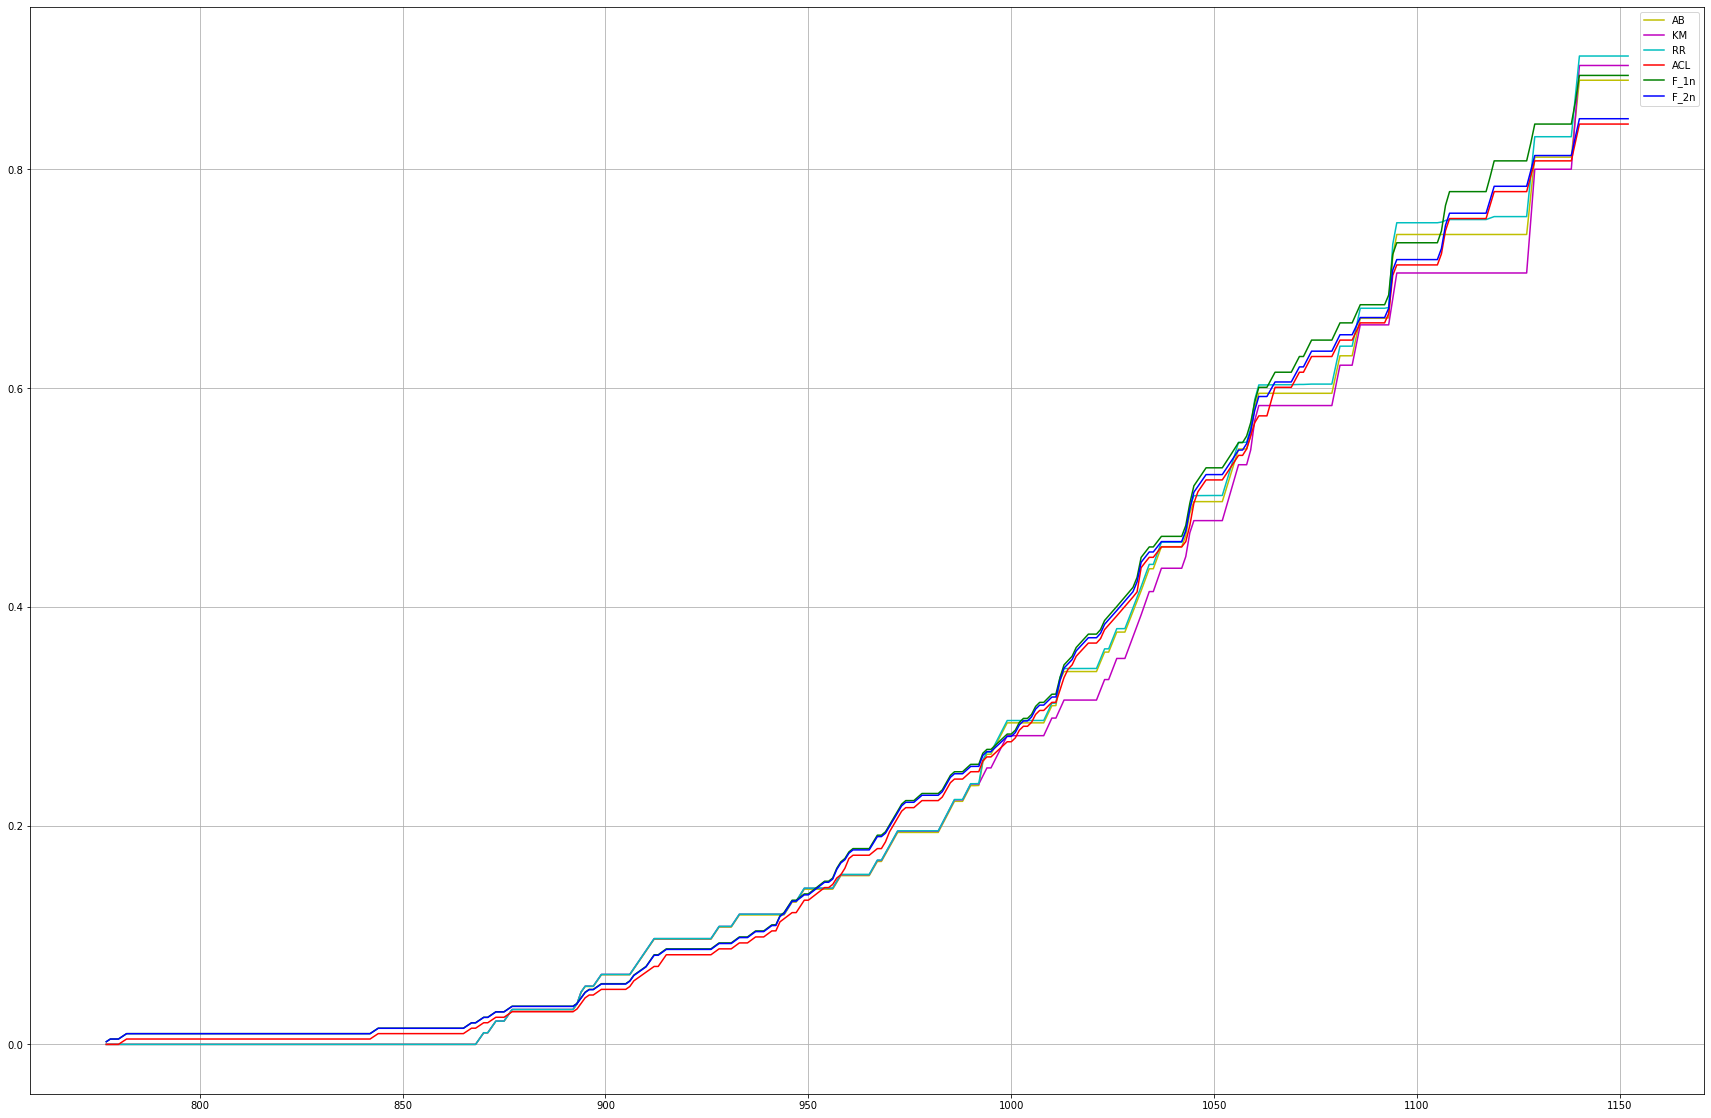

In [63]:
plt.figure(figsize=(30,20))
plt.grid()
plt.plot(x_set, KE_AB_y, color = 'y', label = 'AB')
plt.plot(x_set, KE_KM_y, color = 'm', label = 'KM')
plt.plot(x_set, KE_RR_y, color = 'c', label = 'RR')
plt.plot(x_set, KE_ACL_y, color = 'r', label = 'ACL')
plt.plot(x_set, F_1n_hat_y, color = 'g', label = 'F_1n')
plt.plot(x_set, F_2n_hat_y, color = 'blue', label = 'F_2n')
plt.legend()
plt.show()

------------------
Ядерные оценки для плотности

In [69]:
h_n2 = np.power(set_length, -1/5)

def w(u):
    answer = np.exp(- np.power(u, 2) / 2)
    answer /= np.sqrt(2 * np.pi)
    return answer

In [79]:
def f_AB(x):
    answer = 0.0
    for j in range(1, set_length):
        answer += w((x - months[j]) / h_n2) * (AB_y2[j] - AB_y2[j-1])
    answer /= h_n2
    return answer

In [80]:
f_AB_y = np.zeros(0)

for x in x_set:
    f_AB_y = np.append(f_AB_y, f_AB(x))

f_AB_y

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [81]:
def f_KM(x):
    answer = 0.0
    for j in range(1, set_length):
        answer += w((x - months[j]) / h_n2) * (KM_y2[j] - KM_y2[j-1])
    answer /= h_n2
    return answer

In [82]:
f_KM_y = np.zeros(0)

for x in x_set:
    f_KM_y = np.append(f_KM_y, f_KM(x))

f_KM_y

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [83]:
def f_RR(x):
    answer = 0.0
    for j in range(1, set_length):
        answer += w((x - months[j]) / h_n2) * (RR_y2[j] - RR_y2[j-1])
    answer /= h_n2
    return answer

In [84]:
f_RR_y = np.zeros(0)

for x in x_set:
    f_RR_y = np.append(f_RR_y, f_RR(x))

f_RR_y

array([ 6.13657753e-029,  1.83033184e-019,  1.07177554e-012,
        1.23210649e-008,  2.78075705e-007,  1.23210649e-008,
        1.07177554e-012,  1.83033184e-019,  6.13657753e-029,
        4.03917820e-041,  5.21951559e-056,  1.32415182e-073,
        6.59501462e-094,  6.44858072e-117,  1.23789245e-142,
        4.66521956e-171,  3.45168900e-202,  5.01373788e-236,
        1.42975620e-272,  8.00447315e-312,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
        0.00000000e+000,

In [85]:
def f_ACL(x):
    answer = 0.0
    for j in range(1, set_length):
        answer += w((x - months[j]) / h_n2) * (ACL_y2[j] - ACL_y2[j-1])
    answer /= h_n2
    return answer

In [86]:
f_ACL_y = np.zeros(0)

for x in x_set:
    f_ACL_y = np.append(f_ACL_y, f_ACL(x))

f_ACL_y

array([1.07751561e-024, 3.21386166e-015, 1.88192012e-008, 2.16344366e-004,
       4.88270393e-003, 2.16344366e-004, 1.88192012e-008, 3.21386166e-015,
       1.07751561e-024, 7.09235325e-037, 9.16489606e-052, 2.32506515e-069,
       1.15801213e-089, 1.13229994e-112, 2.17360318e-138, 8.19161312e-167,
       6.06078674e-198, 8.80357300e-232, 2.51049485e-268, 1.40549756e-307,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.41321649e-307,
       2.52428237e-268, 8

In [92]:
def h_n_hat(x):
    answer = 0.0
    for j in range(1, set_length):
        answer += w((x - months[j])/ h_n2)
    answer /= set_length * h_n2
    return  answer

In [96]:
def f_1n_hat(x):
    answer = np.power(1 - H_n_hat(x), p_n - 1)
    answer *= p_n * h_n_hat(x)
    return answer

In [97]:
f_1n_hat_y = np.zeros(0)

for x in x_set:
    f_1n_hat_y = np.append(f_1n_hat_y, f_1n_hat(x))

f_1n_hat_y

array([1.07751174e-024, 3.22264006e-015, 1.88706045e-008, 2.16935298e-004,
       4.90950153e-003, 2.18132930e-004, 1.89747837e-008, 3.24043137e-015,
       1.08642367e-024, 7.15098730e-037, 9.24066428e-052, 2.34428698e-069,
       1.16758567e-089, 1.14166092e-112, 2.19157283e-138, 8.25933499e-167,
       6.11089260e-198, 8.87635409e-232, 2.53124966e-268, 1.41711712e-307,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.41711712e-307,
       2.53124966e-268, 8

In [98]:
def f_2n_hat(x):
    answer = 0.0
    for j in range(1, set_length):
        answer += gamma_nj(j) * w((x - months[j])/ h_n2)
    answer /= set_length * h_n2
    return answer

In [99]:
f_2n_hat_y = np.zeros(0)

for x in x_set:
    f_2n_hat_y = np.append(f_2n_hat_y, f_2n_hat(x))

f_2n_hat_y

array([1.07751561e-024, 3.21386166e-015, 1.88192012e-008, 2.16344366e-004,
       4.88270393e-003, 2.16344366e-004, 1.88192012e-008, 3.21386166e-015,
       1.07751561e-024, 7.09235325e-037, 9.16489606e-052, 2.32506515e-069,
       1.15801213e-089, 1.13229994e-112, 2.17360318e-138, 8.19161312e-167,
       6.06078674e-198, 8.80357300e-232, 2.51049485e-268, 1.40549756e-307,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 1.41321649e-307,
       2.52428237e-268, 8

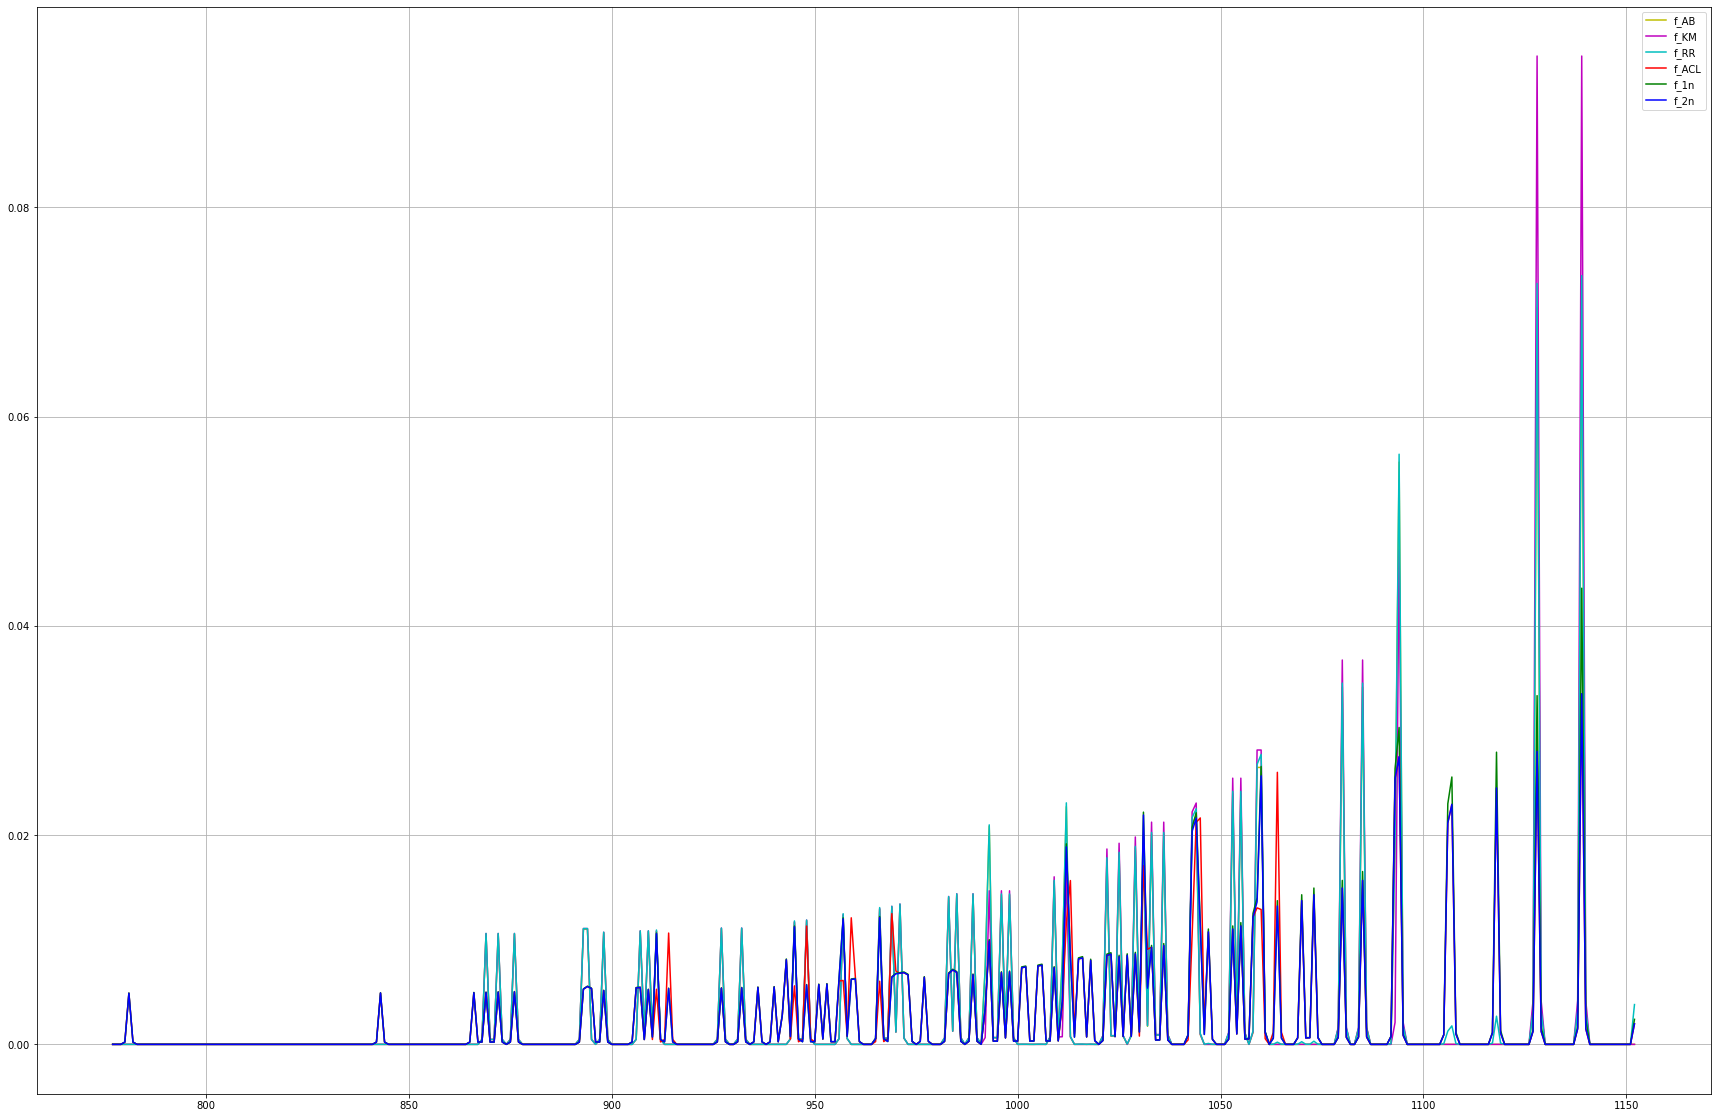

In [100]:
plt.figure(figsize=(30,20))
plt.grid()
plt.plot(x_set, f_AB_y, color = 'y', label = 'f_AB')
plt.plot(x_set, f_KM_y, color = 'm', label = 'f_KM')
plt.plot(x_set, f_RR_y, color = 'c', label = 'f_RR')
plt.plot(x_set, f_ACL_y, color = 'r', label = 'f_ACL')
plt.plot(x_set, f_1n_hat_y, color = 'g', label = 'f_1n')
plt.plot(x_set, f_2n_hat_y, color = 'blue', label = 'f_2n')
plt.legend()
plt.show()